# Prashant Dutt

## Research question/interests
How does seasonality effect various stocks and ETFs in the market? <br>
Which sectors/ stocks/ ETFS are most sensitive and least sensitve to seasonality?

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.show()
plt.rc("axes.spines", top=False, right=False)

Let's load a data set. I've chosen RETL - Direxion Daily Retail Bull 3x Shares:

*"RETL, as a levered product, is a short-term tactical instrument and not a buy-and-hold ETF. Like many levered funds, it promises 3x exposure only for one day. Over longer periods, returns can vary significantly from 3x exposure to its underlying index. Investors should note that RETL's underlying index may have a different take on the retail space than other indexes. The fund tends to overweight apparel, auto-parts & service and specialty retailers, while underweighting department stores. RETL’s exposure also extends to some unexpected sectors like oil & gas refining and marketing. As a short-term product, trading costs are relatively more important for the fund, than with buy-and-hold ETFs. Note: On December 1, 2016, RETL changed its underlying index from Russell 1000 Retail Index to S&P Retail Select Industry Index."*

In [98]:
RETL = pd.read_csv("../data/raw/archive/ETFs/retl.us.txt", sep=",", header=0, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
RETL.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050,0
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763,0
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018,0
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921,0
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019,0


First, let's remove OpenInt from the dataset.

In [99]:
RETL.drop(columns=['OpenInt'], inplace=True)
RETL.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019


Next, we examine the datatypes of the vaious components.

In [100]:
RETL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1782 non-null   object 
 1   Open    1782 non-null   float64
 2   High    1782 non-null   float64
 3   Low     1782 non-null   float64
 4   Close   1782 non-null   float64
 5   Volume  1782 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 83.7+ KB


It looks like the Data column is being treated as a string rather than as a date. Let's fix this.

In [101]:
RETL['Date'] = RETL['Date'].apply(pd.to_datetime)
RETL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1782 non-null   datetime64[ns]
 1   Open    1782 non-null   float64       
 2   High    1782 non-null   float64       
 3   Low     1782 non-null   float64       
 4   Close   1782 non-null   float64       
 5   Volume  1782 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 83.7 KB


Next we want to make the Date column the index column.

In [102]:
RETL.set_index('Date', inplace = True)
RETL.reset_index().head()

,Date,Open,High,Low,Close,Volume
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019


From this data we can see that the **Open** and **Close** columns show the opening and closing price of the ETF on a particular day.

The **High** and **Low** columns provide the highest and lowest price for the ETF on a partiular day, respectively.

The **Volume** column shows the total volume of the ETF traded on a particular day.

**Note:** Since we don't have Adjusted Closing Price in our data set, we will use the **Close** column to perform a detailed analysis.



Let's take a look at a plot of closing prices over the years for RETL.

<AxesSubplot:title={'center':'RETL Closing Prices'}, xlabel='Date'>

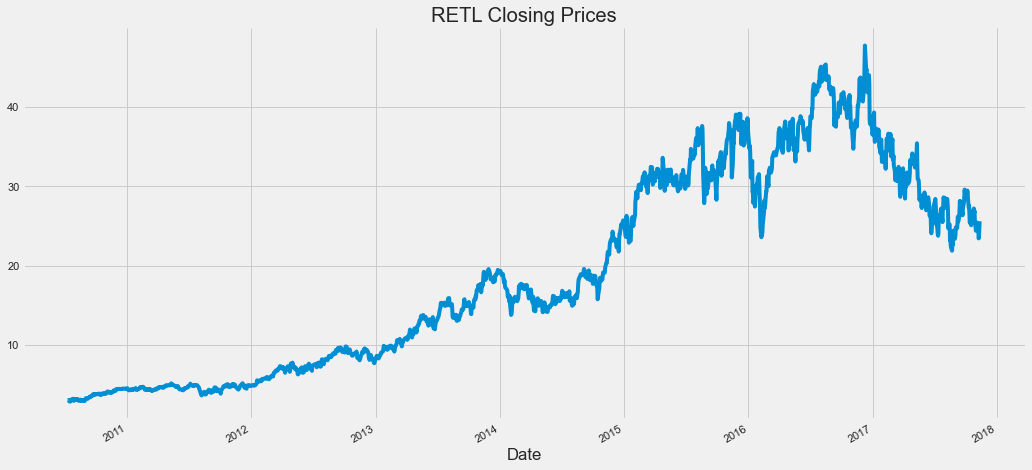

In [103]:
RETL['Close'].plot(figsize=(16,8),title='RETL Closing Prices')

It looks like RETL more or less had a steady increase in its ETF over 2011-2017, followed by a drop from 2017 to 2018. 

Let's use pandas to analyse and manipulare this data to gain insights.

Let's use python's built-in datetime module. 
In pandas, a single point in time is represented as a pandas.Timestamp and we can use the dataframe() function to create dateime objects from strings in a wide variety of date/time formats.

In [104]:
from datetime import datetime
my_year = 2018
my_month = 1
my_day = 1
my_hour = 10
my_minute = 5
my_second = 30

test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  1
The hour is :  10
The month is :  1


Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. 
To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. 
Institutions can then see an overview of stock prices and make decisions according to these trends.           

The pandas library has a resample() function which resamples such time series data. 
The resample method in pandas is similar to its groupby method as it is essentially grouping according to a certain time span. 
The resample() function looks like this:

- data.resample() is used to resample the stock data.
- The ‘A’ stands for year-end frequency, and denotes the offset values by which we want to resample the data.
- mean() indicates that we want the average stock price during this period.

The output looks like this, with average stock data displayed for December 31st of each year   

In [105]:
RETL.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,3.695259,3.723494,3.665628,3.694805,82979.767241
2011-12-31,4.593935,4.622068,4.560398,4.591317,49454.892157
2012-12-31,7.588093,7.668341,7.482349,7.580353,35203.970711
2013-12-31,13.604767,13.767786,13.400687,13.594846,36427.243028
2014-12-31,17.632056,17.838228,17.396540,17.620200,28626.560000
2015-12-31,32.071671,32.619544,31.387214,32.024583,48680.984127
2016-12-31,37.526361,38.061737,36.854949,37.460448,29330.178571
2017-12-31,29.392408,29.872434,28.738192,29.297938,41672.311927


We can also use time sampling to plot charts for specific columns.

Text(0.5, 1.0, 'Monthly Mean Close Price for RETL')

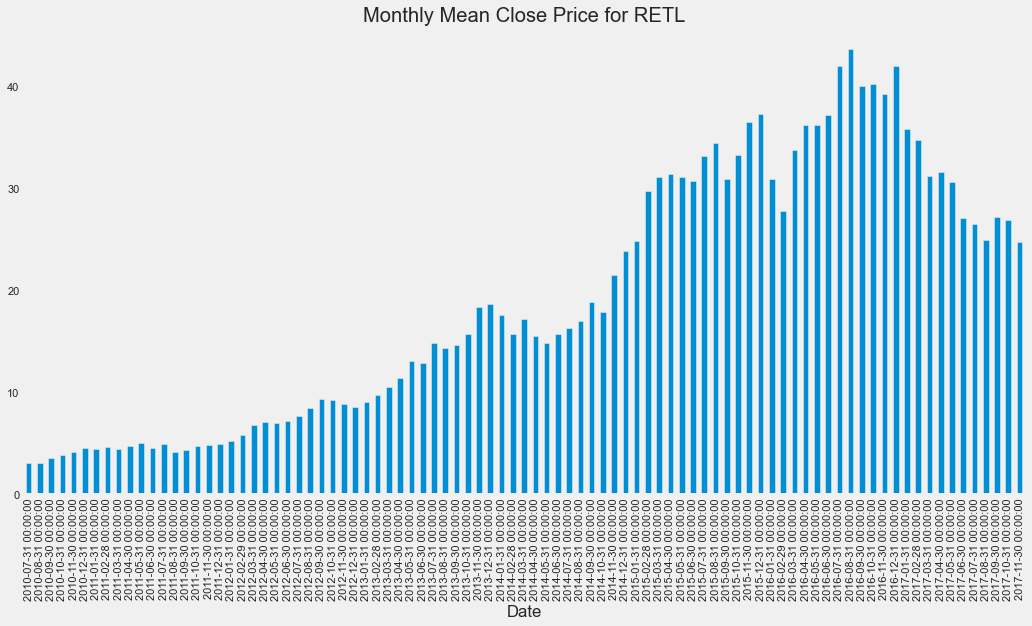

In [107]:
RETL['Close'].resample('M').mean().plot(kind='bar',grid=False, figsize = (16,8))
plt.title('Monthly Mean Close Price for RETL')

The above bar plot corresponds to RETL's average closing price at month-end for each year in our data set.
It's still a bit noisy so let's zoom into 2014-2016 years and see if we can spot any trends.

Text(0.5, 1.0, 'Monthly Mean Close Price for RETL for 2015-2017')

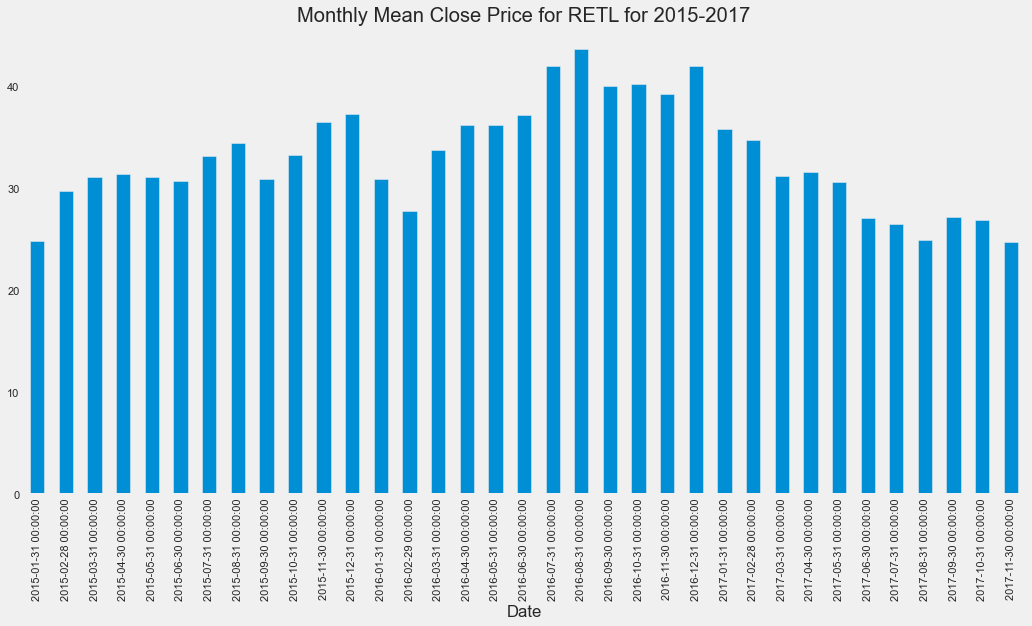

In [213]:
start_date = datetime(2015,1,1)
end_date = datetime(2017,12,1)
RETL[(start_date <= RETL.index) & (RETL.index <= end_date)]['Close'].resample('M').mean().plot(kind ='bar', grid=False, figsize = (16,8))
plt.title('Monthly Mean Close Price for RETL for 2015-2017')

Here we can see that overall there is a drop in close prices around Jan and Feb followed by a steady increase during the rest of the months until Jan and Feb again.

Let's export the processed dataset to save our work.

In [90]:
RETL.to_csv('../data/processed/analysis3_RETL_Processed.csv')

Let's load another data set and try method chaining to see if we get the same results.
Let's load Shopify and drop the OpenInt column.

In [215]:
SHOP = pd.read_csv("../data/raw/archive/Stocks/shop.us.txt", sep=",", header=0, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
SHOP.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2015-05-21,28.00,28.74,24.11,25.68,12305200,0
1,2015-05-22,26.17,31.10,26.00,28.31,2842700,0
2,2015-05-26,29.80,30.34,29.08,29.65,819833,0
3,2015-05-27,30.67,30.81,27.00,27.50,798000,0
4,2015-05-28,27.55,27.74,26.48,27.45,400337,0


In [216]:
SHOP['Date'] = SHOP['Date'].apply(pd.to_datetime)
SHOP.set_index('Date', inplace = True)
SHOP.drop(columns=['OpenInt'], inplace=True)
SHOP.reset_index().head()

,Date,Open,High,Low,Close,Volume
0,2015-05-21,28.00,28.74,24.11,25.68,12305200
1,2015-05-22,26.17,31.10,26.00,28.31,2842700
2,2015-05-26,29.80,30.34,29.08,29.65,819833
3,2015-05-27,30.67,30.81,27.00,27.50,798000
4,2015-05-28,27.55,27.74,26.48,27.45,400337


Text(0.5, 1.0, 'Monthly Mean Close Price for SHOP')

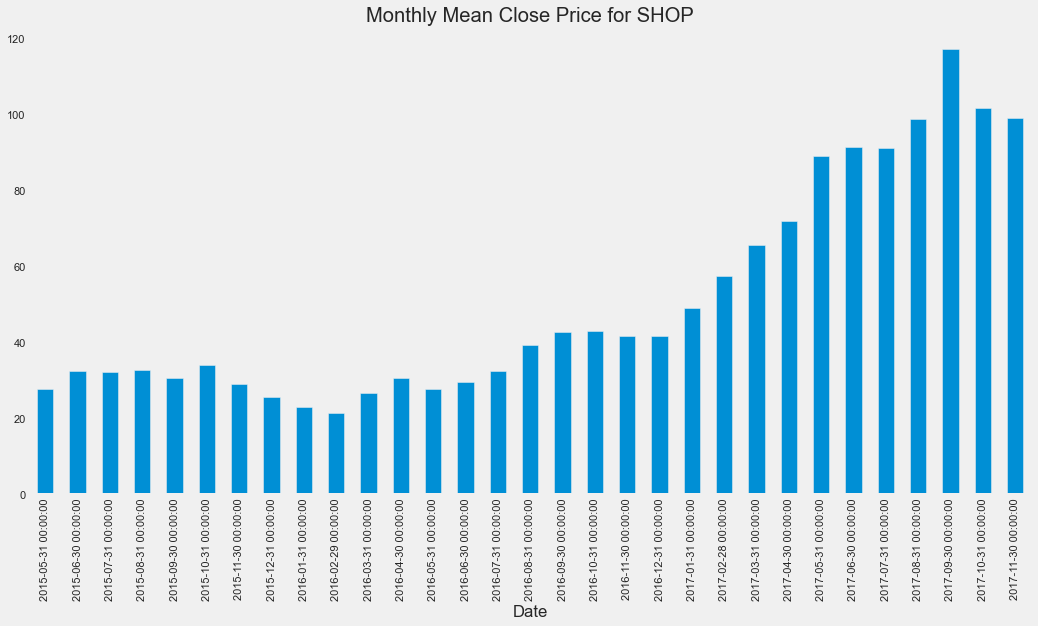

In [217]:
SHOP['Close'].resample('M').mean().plot(kind='bar',grid=False, figsize = (16,8))
plt.title('Monthly Mean Close Price for SHOP')

Note that the dataset only has data from May 2015 until Dec 2017 for SHOP

Text(0.5, 1.0, 'Monthly Mean Close Price for SHOP for May 2015 - Dec 2017')

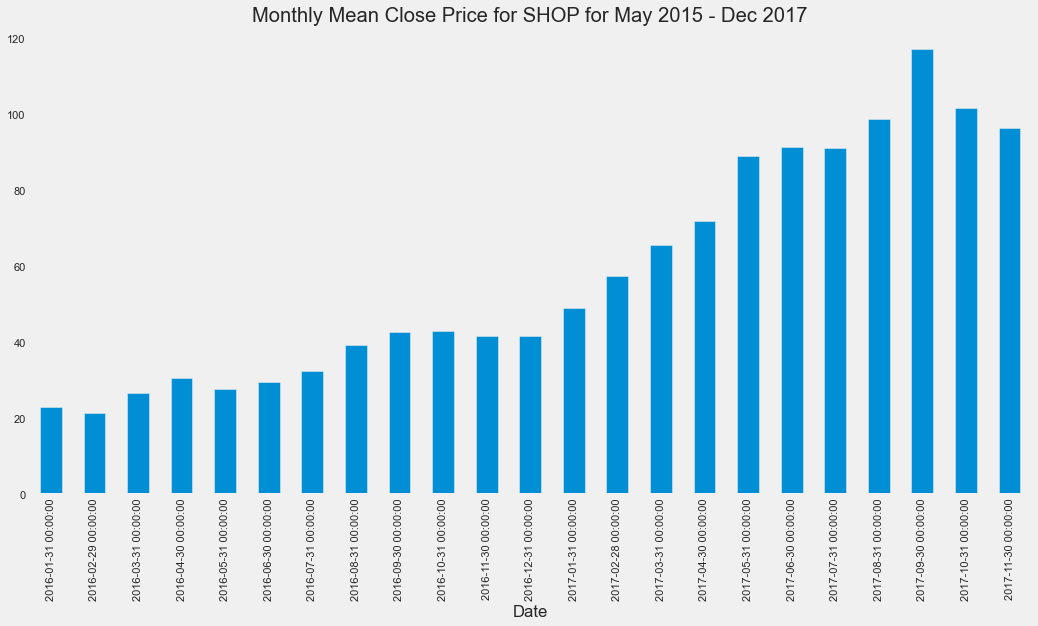

In [221]:
start_date = datetime(2016,1,1)
end_date = datetime(2017,11,1)
SHOP[(start_date <= SHOP.index) & (SHOP.index <= end_date)]['Close'].resample('M').mean().plot(kind ='bar', grid=False, figsize = (16,8))
plt.title('Monthly Mean Close Price for SHOP for May 2015 - Dec 2017')

Here we see a slight drop from Nov 15 until Mar 16 followed by an increase until Nov 15 where it tapers off until Feb 16 wherea again there is a rise until Nov 17.
You can see a slight seasonal trend from year to year.

Let's export the processed file.

In [ ]:
SHOP.to_csv('../data/processed/analysis3_SHOP_Processed.csv')

Now let's set up functions for repeatability and randomness

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
plt.style.use('fivethirtyeight')
plt.show()
plt.rc("axes.spines", top=False, right=False)


def load_and_process(url_or_path_to_csv_file, start, end):
    
    '''
    load_and_process takes a random filename, chosen among the files of the given path.
    It also indicates a start and end date denoted as 'YYYY-MM-DD', processes the dataset and returns a plot and a table.
    '''
    
    n=0
    random.seed();
    for root, dirs, files in os.walk(url_or_path_to_csv_file):
      for name in files:
        n += 1
        if random.uniform(0, n) < 1:
            rfile=os.path.join(root, name)
    print(rfile)
    
    # Method Chain 1 - load data
    df = pd.read_csv(rfile, sep=",", header=0, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
    
    # Method Chain 2 - set time series index
    df['Date'] = df['Date'].apply(pd.to_datetime)
    df.set_index('Date', inplace = True)
    df.drop(columns=['OpenInt'], inplace=True)
    
    # Method Chain 3 - Plot Monthly Mean Close Price for Security
    df['Close'].resample('M').mean().plot(kind='bar',grid=False, figsize = (16,8))
    plt.title('Monthly Mean Close Price for Security')
    
    # Method Chain 4 - Plot Monthly Mean Close Price for Security for 2015 - 2017
    start_date = start
    end_date = end
    df[(start_date <= df.index) & (df.index <= end_date)]['Close'].resample('M').mean().plot(kind ='bar', grid=False, figsize = (16,8))
    plt.title(f'Monthly Mean Close Price for Security between {start} and {end}')
    df.head()

../data/raw/archive/Stocks\ffg.us.txt


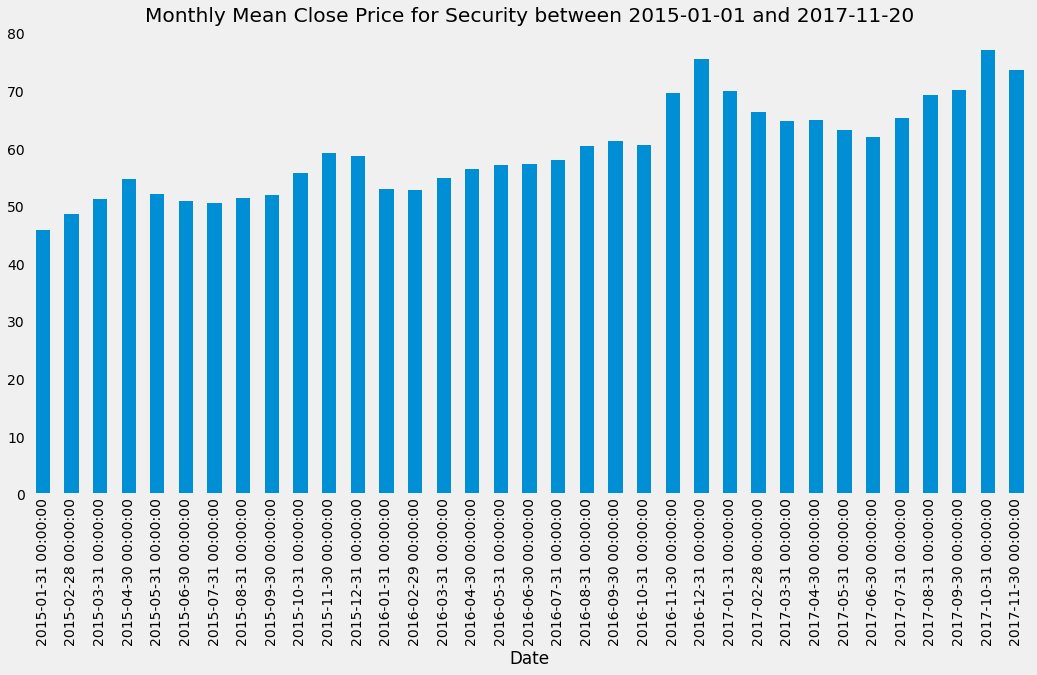

In [137]:
file = '../data/raw/archive/'
start = '2015-01-01'
end = '2017-11-20'

df = load_and_process(file, start, end)

Let's test this saved notebook function

In [136]:
path = '../data/raw/archive/'
start = '2015-01-01'
end = '2017-11-30'
df = project_functions3.load_and_process(path, start , end)

PermissionError: [Errno 13] Permission denied: '../data/raw/archive/'